# Effect of momentum

In this notebook, we will discuss the impact of momentum, which will determine the distance from initialzation to the solution and break the NTK regime.

In [1]:
import torch
from torch import optim, nn
from torchvision import datasets, transforms
from torch.autograd import Variable
import numpy as np
import matplotlib.pyplot as plt
import copy
import os
import random
from models import train_ntk
#os.environ["CUDA_VISIBLE_DEVICES"] = "1"

# training parameters
batch_size = 128

transform = transforms.Compose([
        transforms.ToTensor()
])
train_loader = torch.utils.data.DataLoader(
    datasets.MNIST('data', train=True, download=True, transform=transform),
    batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(
    datasets.MNIST('data', train=False, download=True, transform=transform),
    batch_size=batch_size, shuffle=True)

In [2]:
h_dim = 5000
train_epoch = 100
alpha_set = [h_dim**(0.1*k) for k in range(11)]
alpha = alpha_set[5]

In [ ]:
srr1,saa1,sll1 = train_ntk(train_loader, test_loader,h_dim,alpha,train_epoch,.1,0)

srr2,saa2,sll2 = train_ntk(train_loader, test_loader,h_dim,alpha,train_epoch,.1,0.5)

srr3,saa3,sll3 = train_ntk(train_loader, test_loader,h_dim,alpha,train_epoch,.1,0.9)

## Plot

According to the notebook, a large momentum will break NTK regime as it takes parameter further. However, as is often used in practice, the momentum employed optimization might let NN have better performance.

Text(0.5, 0, 'epoch')

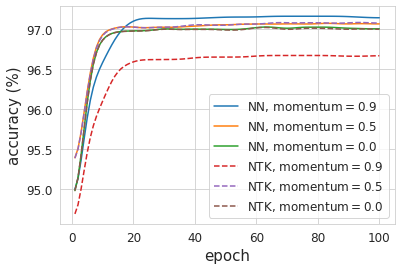

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

from scipy.ndimage.filters import gaussian_filter1d

plt.plot(np.arange(train_epoch)+1,100*gaussian_filter1d(np.array(saa3)[:,0],3),label = r'NN, momentum$=0.9$')
plt.plot(np.arange(train_epoch)+1,100*gaussian_filter1d(np.array(saa2)[:,0],3),label = r'NN, momentum$=0.5$')
plt.plot(np.arange(train_epoch)+1,100*gaussian_filter1d(np.array(saa1)[:,0],3),label = r'NN, momentum$=0.0$')
plt.plot(np.arange(train_epoch)+1,100*gaussian_filter1d(np.array(saa3)[:,1],3,),linestyle='dashed',label = r'NTK, momentum$=0.9$')


plt.plot(np.arange(train_epoch)+1,100*gaussian_filter1d(np.array(saa2)[:,1],3),linestyle='dashed',label = r'NTK, momentum$=0.5$')
plt.plot(np.arange(train_epoch)+1,100*gaussian_filter1d(np.array(saa1)[:,1],3),linestyle='dashed',label = r'NTK, momentum$=0.0$')


#plt.plot(np.arange(50)+1,np.array(srr4)[:,0],label = r'$\alpha = m^{0.7}$')


plt.legend(fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.ylabel(r'accuracy (%)',fontsize=15)
plt.xlabel('epoch',fontsize=15)

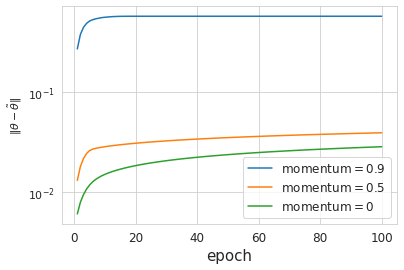

In [5]:
plt.plot(np.arange(train_epoch)+1,np.array(srr3)[:,0],label = r'momentum$ = 0.9$')
plt.plot(np.arange(train_epoch)+1,np.array(srr2)[:,0],label = r'momentum$ = 0.5$')
plt.plot(np.arange(train_epoch)+1,np.array(srr1)[:,0],label = r'momentum$ = 0$')
#plt.plot(np.arange(50)+1,np.array(srr4)[:,0],label = r'$\alpha = m^{0.7}$')

plt.legend(fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=11)

plt.ylabel(r'${\Vert \theta-\tilde{\theta} \Vert}$',fontsize=11)
plt.xlabel('epoch',fontsize=15)
#plt.ylim([0.1,10])
plt.yscale('log')

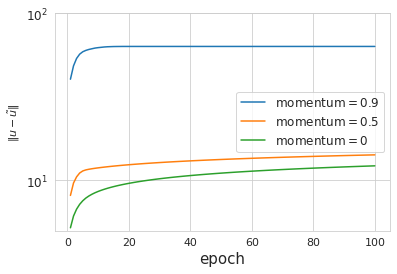

In [6]:
plt.plot(np.arange(train_epoch)+1,np.array(srr3)[:,1],label = r'momentum$ = 0.9$')

plt.plot(np.arange(train_epoch)+1,np.array(srr2)[:,1],label = r'momentum$ = 0.5$')

plt.plot(np.arange(train_epoch)+1,np.array(srr1)[:,1],label = r'momentum$ = 0$')
#plt.plot(np.arange(50)+1,np.array(srr4)[:,0],label = r'$\alpha = m^{0.7}$')

plt.legend(fontsize=12)
plt.xticks(fontsize=11)
plt.yticks(fontsize=12)

plt.ylabel(r'${\Vert u-\tilde{u} \Vert}$',fontsize=11)
plt.xlabel('epoch',fontsize=15)
plt.ylim([5,100])
plt.yscale('log')